**STEP3**

In [1]:
!pip install aif360

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load the required libraries in step 3

In [4]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt

from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing

from IPython.display import Markdown, display

In [5]:
### read the data set
data = pd.read_csv('content/student-por.csv', sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
## Outcome paid
## protected class sex
# create StandardDataset from pandas dataframe
dataset_orig = StandardDataset(
            df=data,
            label_name='paid',
            favorable_classes=['yes'],
            protected_attribute_names=['sex'],
            privileged_classes=[['M']],
            categorical_features=['school', 'address', 'famsize', 'Pstatus', 'Medu', 
                                   'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
                                   'studytime', 'failures', 'schoolsup', 'famsup', 'activities', 'nursery', 
                                   'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                                   'Dalc', 'Walc', 'health'],
            features_to_drop=[]
        )

privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
metric_orig = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig.statistical_parity_difference())
print("DI: ", metric_orig.disparate_impact())

#### Original dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.038320
DI:  0.5366722050795159


In [7]:
## Outcome paid
## For protected class sex
###Bias mitigation through reweighting algoithm
##just like the sklearn library, create the object of Reweight algorithm
##then fit and transform it on training dataset.
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf = RW.fit_transform(dataset_orig)

metric_orig = BinaryLabelDatasetMetric(dataset_transf, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Transformed dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig.statistical_parity_difference())
print("DI: ", metric_orig.disparate_impact())

#### Transformed dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.000000
DI:  0.9999999999999994


In [8]:
## Outcome paid
## protected class age
# create StandardDataset from pandas dataframe
dataset_orig = StandardDataset(
            df=data,
            label_name='paid',
            favorable_classes=['yes'],
            protected_attribute_names=['age'],
            privileged_classes=[lambda x: x<=18],
            categorical_features=['school', 'address', 'famsize', 'Pstatus', 'Medu', 'sex',
                                   'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
                                   'studytime', 'failures', 'schoolsup', 'famsup', 'activities', 'nursery', 
                                   'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                                   'Dalc', 'Walc', 'health'],
            features_to_drop=[]
        )

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
metric_orig = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig.statistical_parity_difference())
print("DI: ", metric_orig.disparate_impact())

#### Original dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.012075
DI:  0.8015820698747528


In [9]:
## Outcome paid
## For protected class sex
###Bias mitigation through reweighting algoithm
##just like the sklearn library, create the object of Reweight algorithm
##then fit and transform it on training dataset.
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf = RW.fit_transform(dataset_orig)

metric_orig = BinaryLabelDatasetMetric(dataset_transf, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Transformed dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig.statistical_parity_difference())
print("DI: ", metric_orig.disparate_impact())

#### Transformed dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000
DI:  1.0


In [10]:
## Outcome activities
## protected class age
dataset_orig = StandardDataset(
            df=data,
            label_name='activities',
            favorable_classes=['yes'],
            protected_attribute_names=['age'],
            privileged_classes=[lambda x: x<=18],
            categorical_features=['school', 'address', 'famsize', 'Pstatus', 'Medu', 'sex',
                                   'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
                                   'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'nursery', 
                                   'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                                   'Dalc', 'Walc', 'health'],
            features_to_drop=[]
        )

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
metric_orig = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig.statistical_parity_difference())
print("DI: ", metric_orig.disparate_impact())

#### Original dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.049462
DI:  0.8987435328898743


In [11]:
## Outcome activities
## For protected class age
###Bias mitigation through reweighting algoithm
##just like the sklearn library, create the object of Reweight algorithm
##then fit and transform it on training dataset.
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf = RW.fit_transform(dataset_orig)

metric_orig = BinaryLabelDatasetMetric(dataset_transf, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Transformed dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig.statistical_parity_difference())
print("DI: ", metric_orig.disparate_impact())

#### Transformed dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000
DI:  1.0


In [12]:
## Outcome activities
## protected class sex
# create StandardDataset from pandas dataframe
dataset_orig = StandardDataset(
            df=data,
            label_name='activities',
            favorable_classes=['yes'],
            protected_attribute_names=['sex'],
            privileged_classes=[['M']],
            categorical_features=['school', 'address', 'famsize', 'Pstatus', 'Medu', 
                                   'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
                                   'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'nursery', 
                                   'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                                   'Dalc', 'Walc', 'health'],
            features_to_drop=[]
        )

privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
metric_orig = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig.statistical_parity_difference())
print("DI: ", metric_orig.disparate_impact())

#### Original dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.126730
DI:  0.7737571626333959


In [13]:
## Outcome activities
## For protected class sex
###Bias mitigation through reweighting algoithm
##just like the sklearn library, create the object of Reweight algorithm
##then fit and transform it on training dataset.
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf = RW.fit_transform(dataset_orig)

metric_orig = BinaryLabelDatasetMetric(dataset_transf, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Transformed dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig.statistical_parity_difference())
print("DI: ", metric_orig.disparate_impact())

#### Transformed dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000
DI:  1.0000000000000004


**STEP4**

Load the required libraries in step 4

In [14]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt

from aif360.datasets import BankDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing

Original Dataset

In [15]:
# Split original dataset into train and test sets (80/20)
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.8], shuffle=True, seed = 24)

# Preprocessing
scaler = StandardScaler()
dataset_orig_train.features = scaler.fit_transform(dataset_orig_train.features)
dataset_orig_test.features = scaler.transform(dataset_orig_test.features)

# Train classifier
orig_clf = LogisticRegression(random_state = 24)
orig_clf.fit(dataset_orig_train.features, dataset_orig_train.labels.ravel())

# Evaluate accuracy
y_orig_pred = orig_clf.predict(dataset_orig_test.features)

# Evaluate fairness
sensitive_attr = 'sex'
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
 
# Create binary label dataset
orig_preds = orig_clf.predict(dataset_orig_test.features)
dataset_orig_test_pred = dataset_orig_test.copy()
dataset_orig_test_pred.labels = orig_preds.reshape(-1, 1)

# Compute fairness metrics
metric_pred = BinaryLabelDatasetMetric(dataset_orig_test_pred, 
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)

# Print fairness metrics
print("Statistical parity difference in original dataset:", metric_pred.statistical_parity_difference())
print("Disparate impact original dataset:", metric_pred.disparate_impact())


Statistical parity difference in original dataset: -0.21911196911196912
Disparate impact original dataset: 0.6770981507823614


Transformed Dataset

In [16]:
# Split transformed dataset into train and test sets (80/20)
dataset_transf_train, dataset_transf_test = dataset_transf.split([0.8], shuffle=True, seed = 24)

# Preprocessing
scaler = StandardScaler()
dataset_transf_train.features = scaler.fit_transform(dataset_transf_train.features)
dataset_transf_test.features = scaler.transform(dataset_transf_test.features)

# Train classifier
transf_clf = LogisticRegression(random_state = 24)
transf_clf.fit(dataset_transf_train.features, dataset_transf_train.labels.ravel())

# Evaluate accuracy
y_transf_pred = transf_clf.predict(dataset_transf_test.features)

# Evaluate fairness
sensitive_attr = 'sex'
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
 
# Create binary label dataset
transf_preds = transf_clf.predict(dataset_transf_test.features)
dataset_transf_test_pred = dataset_transf_test.copy()
dataset_transf_test_pred.labels = transf_preds.reshape(-1, 1)

# Compute fairness metrics
metric_pred = BinaryLabelDatasetMetric(dataset_transf_test_pred, 
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)

# Print fairness metrics
print("Statistical parity difference in transformed dataset:", metric_pred.statistical_parity_difference())
print("Disparate impact transformed dataset:", metric_pred.disparate_impact())

Statistical parity difference in transformed dataset: -0.2008457056133221
Disparate impact transformed dataset: 0.7001103088263103


**Step 5 - figures in step 3**

Plots from 3.2

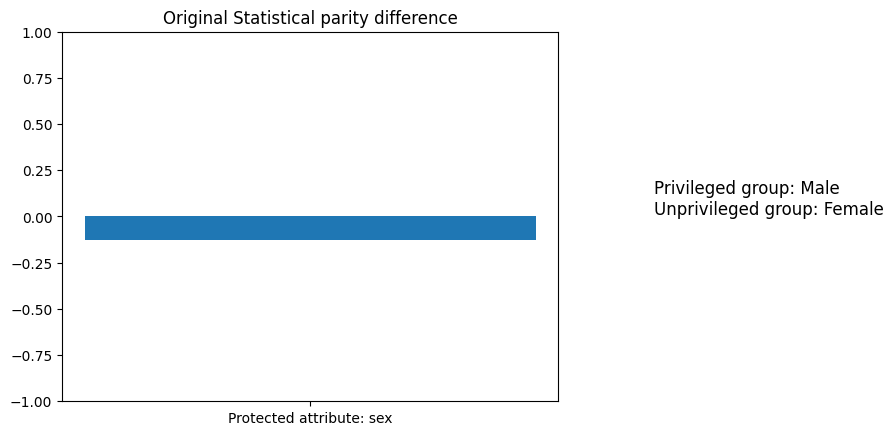

In [17]:
# data
diff = -0.127

# plot
plt.bar(x='Protected attribute: sex', height=diff)
plt.ylim([-1, 1])
plt.title('Original Statistical parity difference')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)


plt.show()

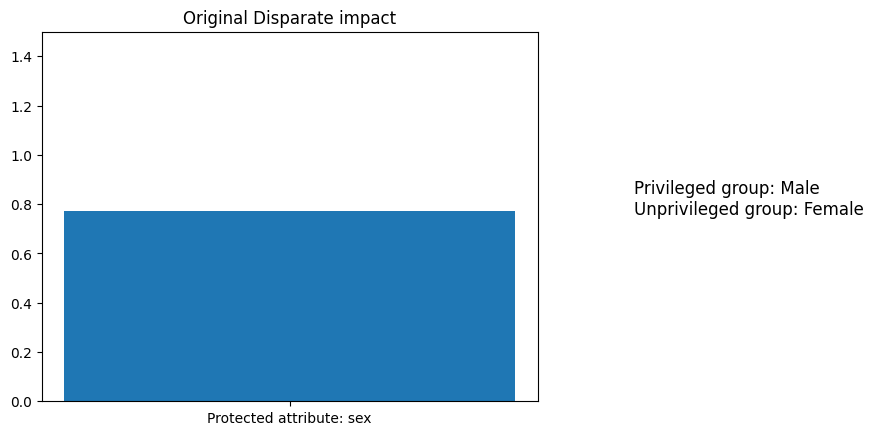

In [18]:
# data
di = 0.774

# plot
plt.bar(x='Protected attribute: sex', height=di)
plt.ylim([0, 1.5])
plt.title('Original Disparate impact')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

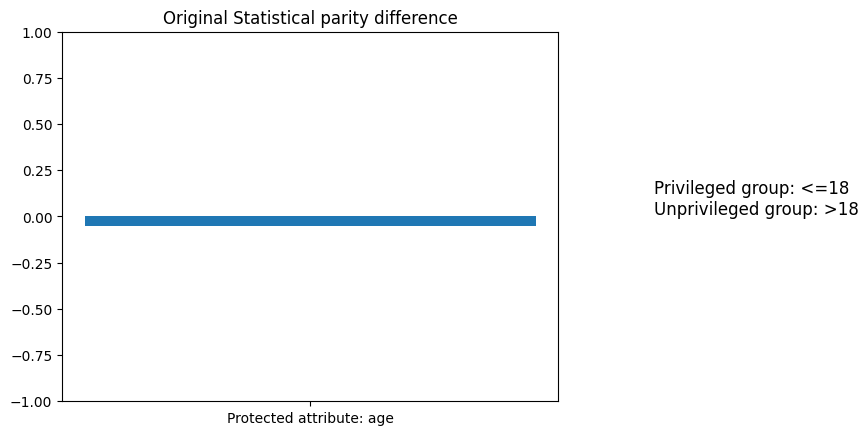

In [19]:
# data
diff = -0.049

# plot
plt.bar(x='Protected attribute: age', height=diff)
plt.ylim([-1, 1])
plt.title('Original Statistical parity difference')

# note
note = 'Privileged group: <=18 \nUnprivileged group: >18'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)


plt.show()

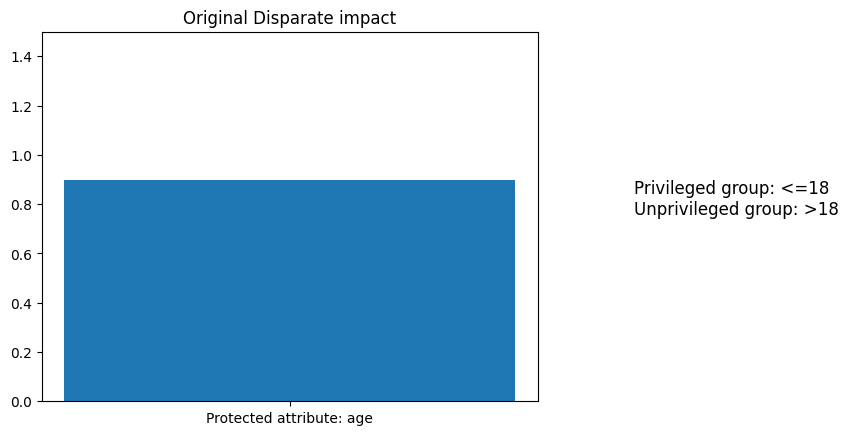

In [20]:
# data
di = 0.899

# plot
plt.bar(x='Protected attribute: age', height=di)
plt.ylim([0, 1.5])
plt.title('Original Disparate impact')

# note
note = 'Privileged group: <=18 \nUnprivileged group: >18'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

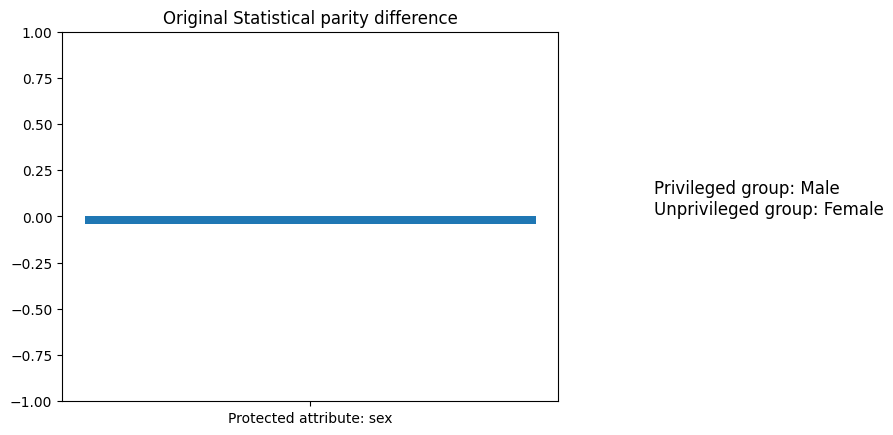

In [21]:
# data
diff = -0.038

# plot
plt.bar(x='Protected attribute: sex', height=diff)
plt.ylim([-1, 1])
plt.title('Original Statistical parity difference')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)


plt.show()

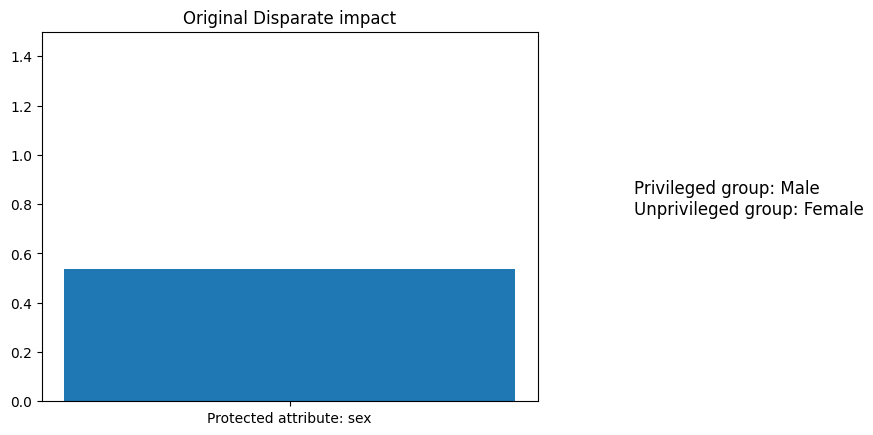

In [22]:
# data
di = 0.537

# plot
plt.bar(x='Protected attribute: sex', height=di)
plt.ylim([0, 1.5])
plt.title('Original Disparate impact')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

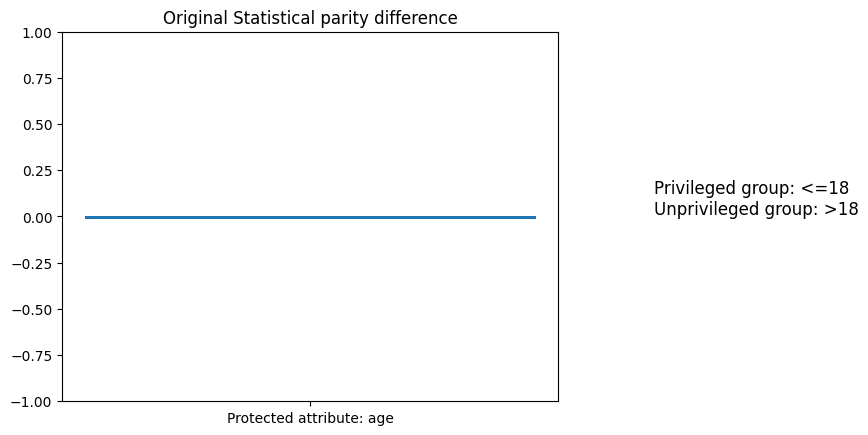

In [23]:
# data
diff = -0.012

# plot
plt.bar(x='Protected attribute: age', height=diff)
plt.ylim([-1, 1])
plt.title('Original Statistical parity difference')

# note
note = 'Privileged group: <=18 \nUnprivileged group: >18'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)


plt.show()

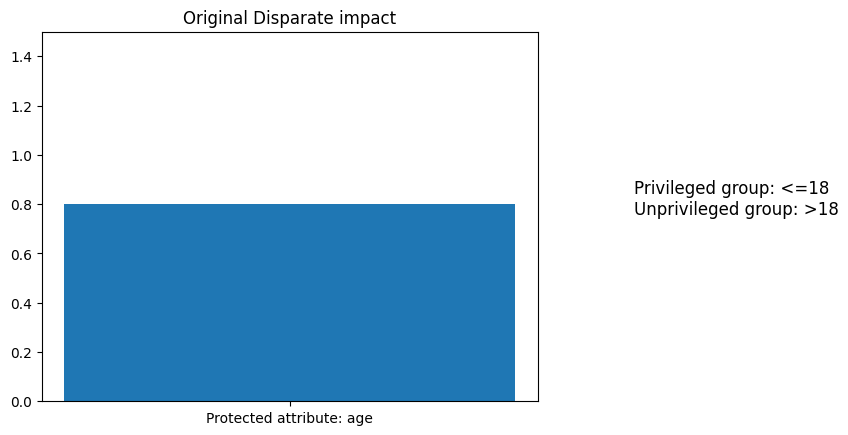

In [24]:
# data
di = 0.802

# plot
plt.bar(x='Protected attribute: age', height=di)
plt.ylim([0, 1.5])
plt.title('Original Disparate impact')

# note
note = 'Privileged group: <=18 \nUnprivileged group: >18'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

Plots from 3.4

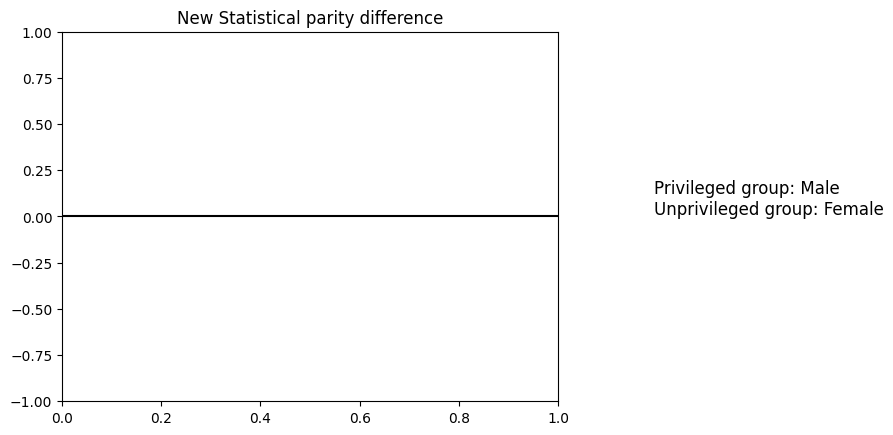

In [25]:

# plot
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim([-1, 1])
plt.title('New Statistical parity difference')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)


plt.show()

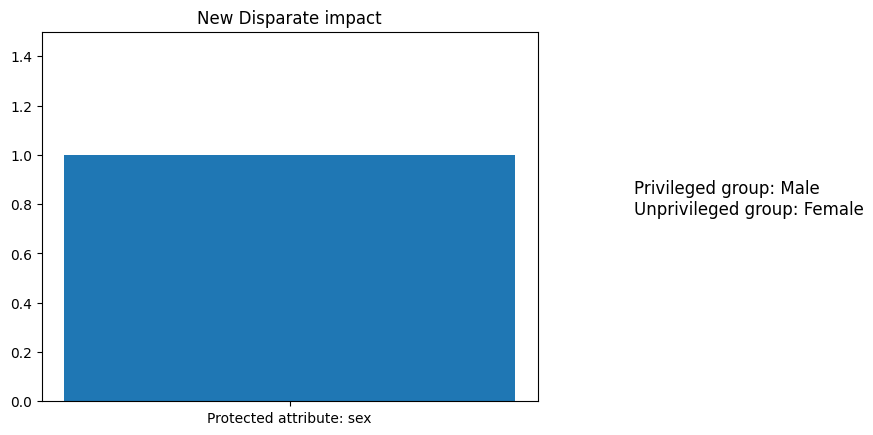

In [26]:
# data
di = 1

# plot
plt.bar(x='Protected attribute: sex', height=di)
plt.ylim([0, 1.5])
plt.title('New Disparate impact')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

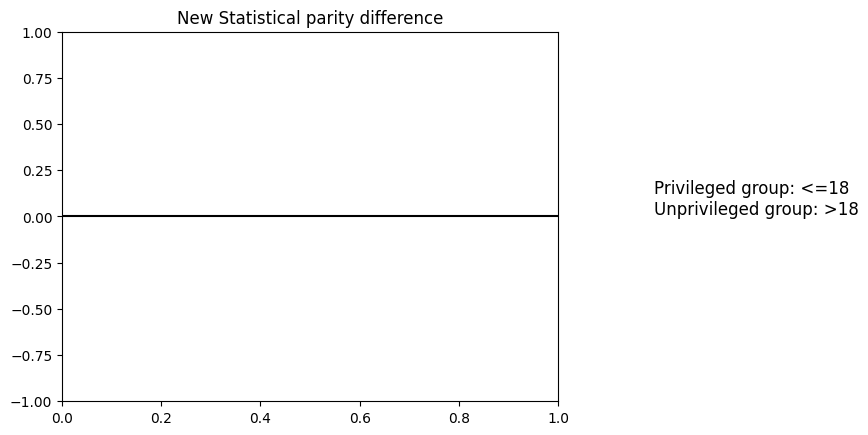

In [27]:

# plot
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim([-1, 1])
plt.title('New Statistical parity difference')

# note
note = 'Privileged group: <=18 \nUnprivileged group: >18'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)


plt.show()

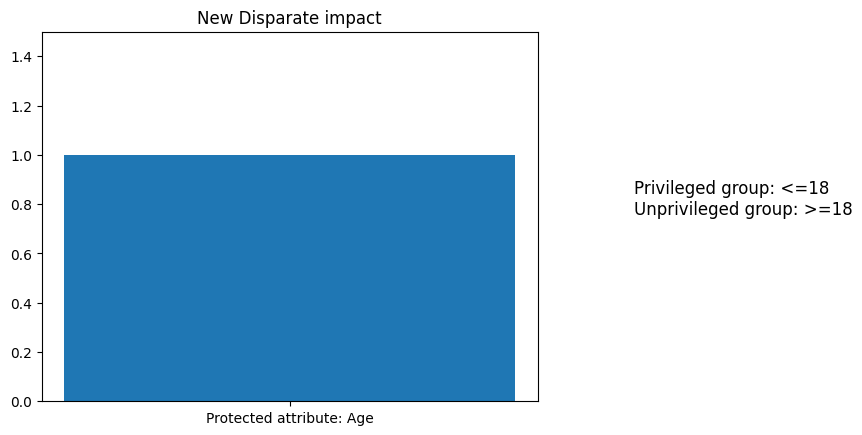

In [28]:
# data
di = 1

# plot
plt.bar(x='Protected attribute: Age', height=di)
plt.ylim([0, 1.5])
plt.title('New Disparate impact')

# note
note = 'Privileged group: <=18 \nUnprivileged group: >=18'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

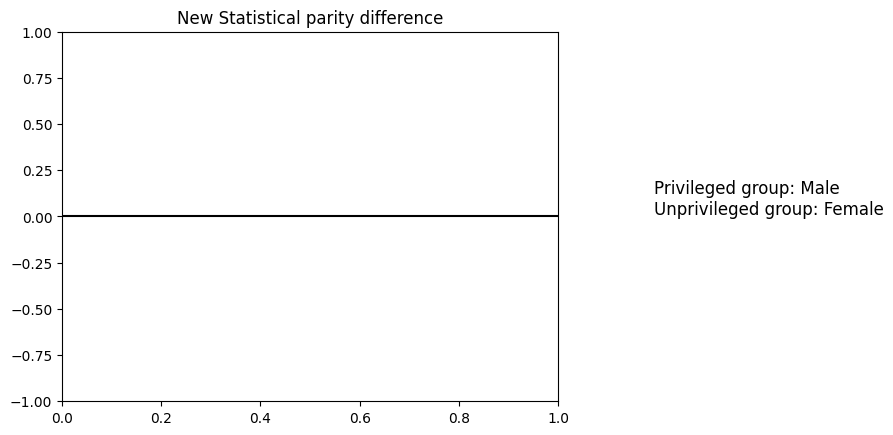

In [29]:

# plot
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim([-1, 1])
plt.title('New Statistical parity difference')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)


plt.show()

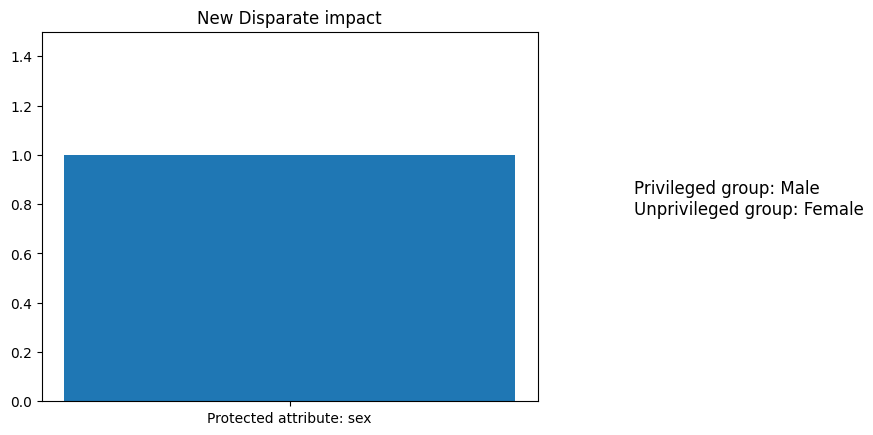

In [30]:
# data
di = 1

# plot
plt.bar(x='Protected attribute: sex', height=di)
plt.ylim([0, 1.5])
plt.title('New Disparate impact')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

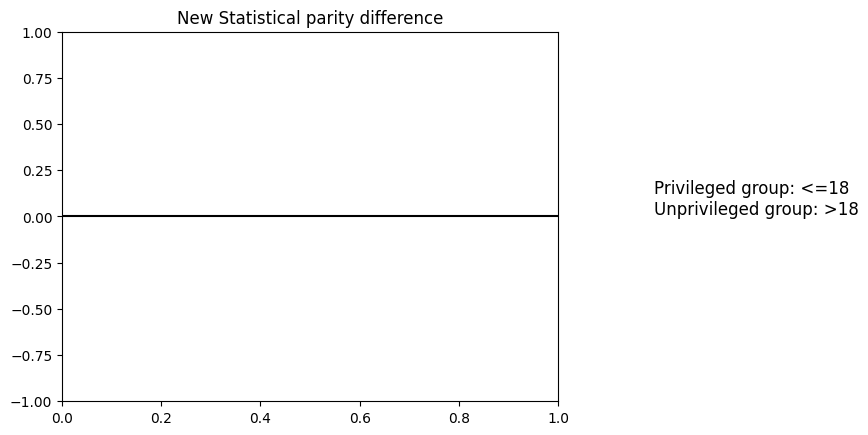

In [31]:
# plot
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim([-1, 1])
plt.title('New Statistical parity difference')

# note
note = 'Privileged group: <=18 \nUnprivileged group: >18'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)


plt.show()

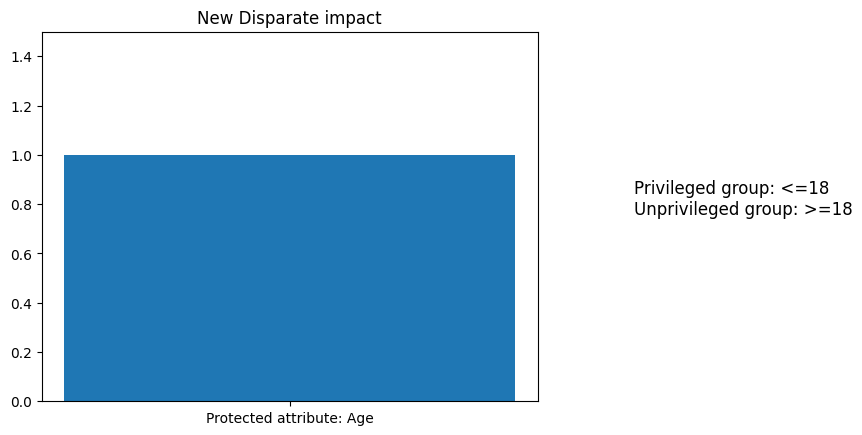

In [32]:
# data
di = 1

# plot
plt.bar(x='Protected attribute: Age', height=di)
plt.ylim([0, 1.5])
plt.title('New Disparate impact')

# note
note = 'Privileged group: <=18 \nUnprivileged group: >=18'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

**Step 5 - figures in step 4.5**

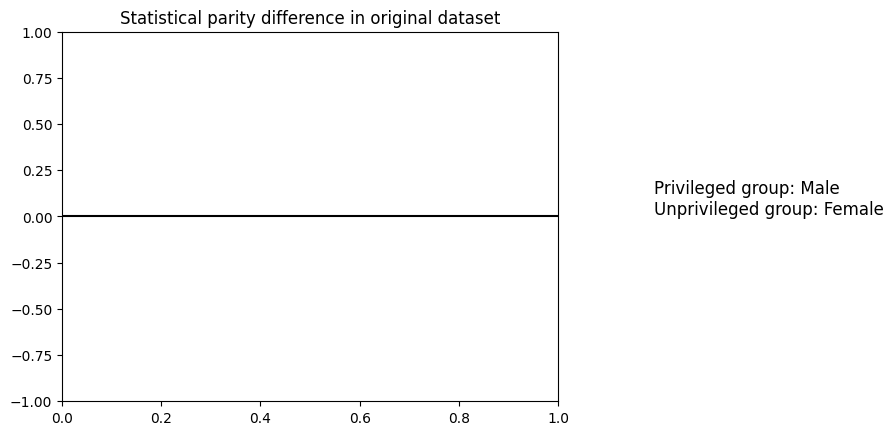

In [33]:
# data
diff = -0.2191

# plot
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim([-1, 1])
plt.title('Statistical parity difference in original dataset')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

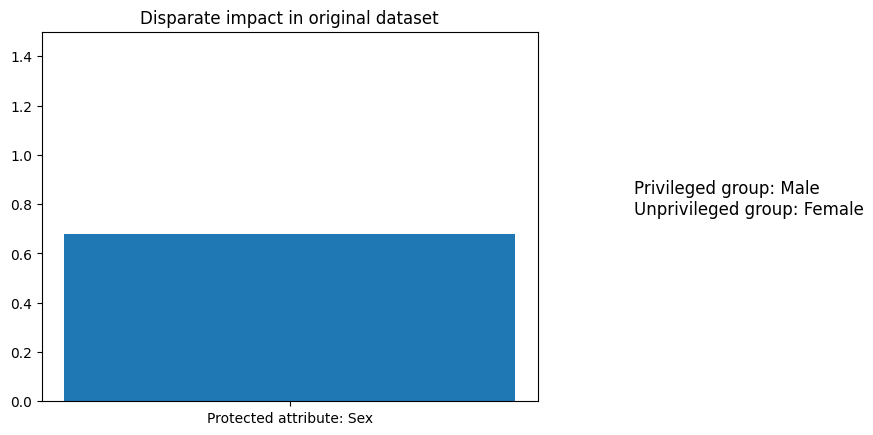

In [34]:
# data
di = 0.6771

# plot
plt.bar(x='Protected attribute: Sex', height=di)
plt.ylim([0, 1.5])
plt.title('Disparate impact in original dataset')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

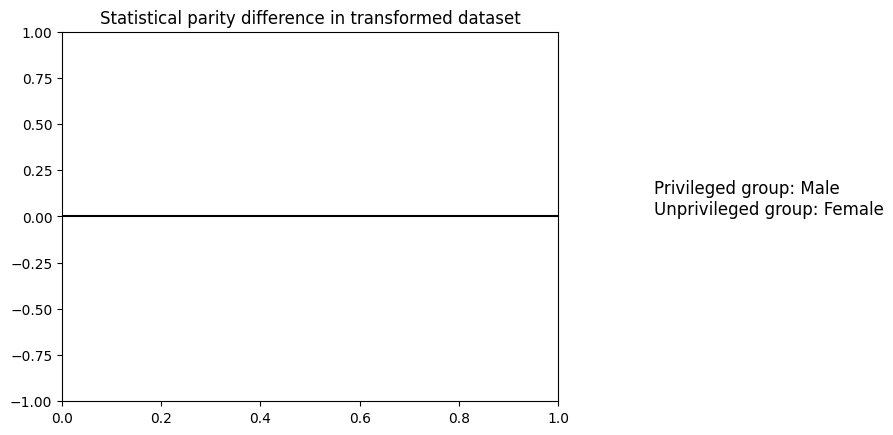

In [35]:
# data
diff = -0.2008

# plot
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim([-1, 1])
plt.title('Statistical parity difference in transformed dataset')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

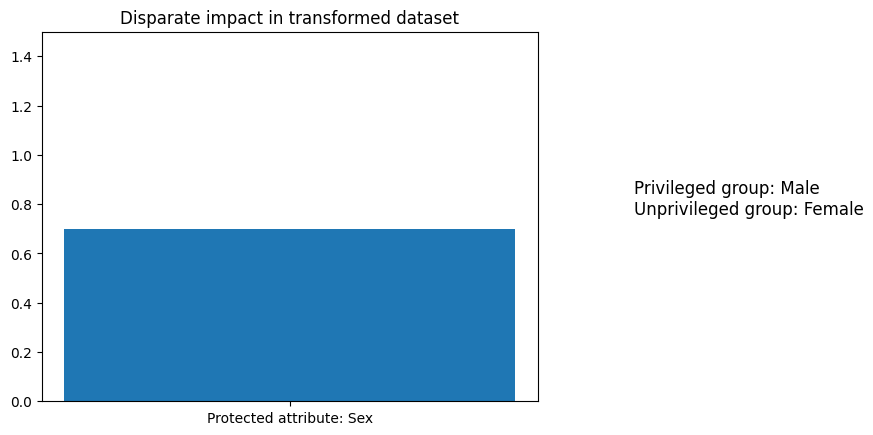

In [36]:
# data
di = 0.7001

# plot
plt.bar(x='Protected attribute: Sex', height=di)
plt.ylim([0, 1.5])
plt.title('Disparate impact in transformed dataset')

# note
note = 'Privileged group: Male \nUnprivileged group: Female'
plt.text(1.05, 0.5, note, fontsize=12, transform=plt.gcf().transFigure)

plt.show()